## Technical Questions

1. Code Understanding & Design

What is the core logic of my code? Can I explain it clearly?

Why did I choose this data structure or algorithm? Is there a better alternative?

How does my code handle edge cases or unexpected input?

How modular and reusable is this code? Could I turn parts into functions or classes?

How would I test my code? What are the possible bugs or failure modes?

2. Debugging & Problem Solving

What is actually causing any bugs or errors I see? How can I isolate the problem?

What steps am I taking to debug? (e.g., print statements, visualization, unit tests)

How could I make debugging easier in the future (logging, better structure, etc.)?

If my code works, is it robust? Will it break for different data or environments?

3. Algorithmic Thinking & Efficiency

Is my solution efficient? What is the time and space complexity?

Can I improve performance (vectorization, parallelization, memory usage)?

How does this scale with more data or larger images?

Are there standard libraries or algorithms that solve this more efficiently?

4. Computer Vision-Specific

What assumptions am I making about the images/data? Are they realistic?

How would this approach work on real, noisy, or varied data?

What are the failure cases for my CV pipeline?

How can I visualize/interrogate them?

How can I interpret or visualize model results (feature maps, activations, etc.)?

How do annotation formats and standards work (COCO, Pascal VOC, etc.)?

5. Software Engineering & Scaling

How would I add new features to this project? Is the code easy to extend?

How would I handle multiple users or large datasets?

How can I document and structure my code for collaborators?

What would I do differently if this were a production tool?

6. Learning & Growth

What did I learn from this project/bug/feature?

What would I do differently next time to be more efficient or robust?

Which concepts or libraries did I struggle with, and how can I strengthen those areas?

How do professional CV tools/projects solve similar problems?

7. Advanced/Research-Oriented

What are the state-of-the-art methods for this problem?

How do I compare my results to published benchmarks or datasets?

How can I make my tools more general or useful for others?

What are the open challenges in this CV subfield, and how is the community addressing them?

How to Use These Questions

Journal: After every project or major bugfix, write answers to several of these.

Research: If you can’t answer one, look up papers, blogs, or ask mentors/community.

Retrospective: Revisit older code and ask these questions—find areas for improvement.

Code Reviews: Use these as prompts when reviewing your own or others’ code.

## **Project: Image Annotation Tool (Mini Project)**

**Project Description**

Build a simple image annotation tool using Python and Matplotlib that lets a user load an image, overlay bounding boxes and/or points on the image (either from a simulated database or by hardcoding), and display the results. The goal is to practice figure/axes management, overlays, labeling, color selection, and exporting/saving figures—just like a basic version of annotation tools used in computer vision.

Text(0.5, 1.0, 'Color Image')

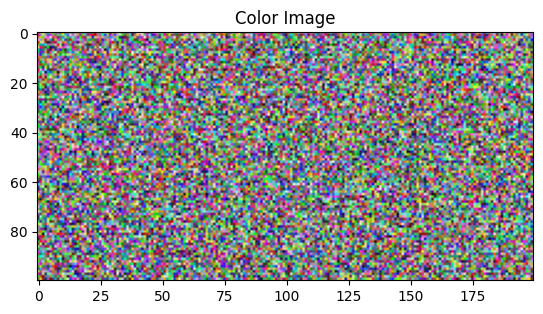

In [ ]:
# 1. load and display images with matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_np = np.random.randint(0, 255, (100, 200, 3), dtype=np.uint8)
plt.imshow(img_np)
plt.title("Color Image")

Text(0.5, 1.0, 'Grayscale Image')

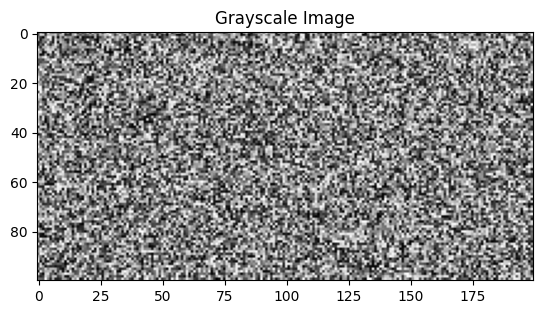

In [ ]:
img_gray = np.random.randint(0, 255, (100, 200), dtype=np.uint8)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")

2. Overlay Annotations

Overlay bounding boxes (rectangles) and/or points (for keypoint annotation) on the image.
Each annotation should have a label (e.g., "cat", "dog", or "left eye", "right ear").

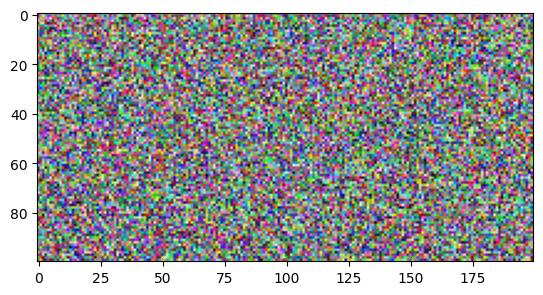

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img_np)

Text(10, 20, 'this needs attention')

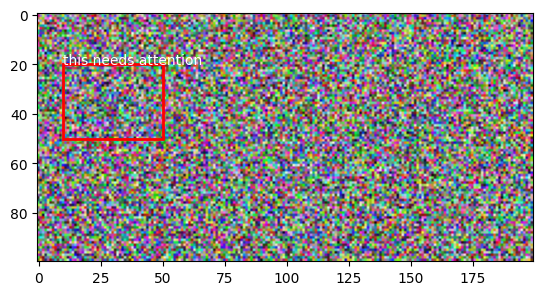

In [ ]:
from matplotlib.patches import Rectangle

# create axes
fig, ax = plt.subplots()
ax.imshow(img_np) # show image as background
# set size for rectangle draw
rec = Rectangle((10,20), 40, 30, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rec)

ax.text(10,20, "this needs attention", color='white')

3. Color and Style Customization

- Use different colors and line styles for different labels or annotation types.
- Use legends and titles for clarity.

In [ ]:
color_map = {'cat': 'red', 'dog': 'blue'}
style_map = {'bbox': '--', 'keypoint': 'o'}
second_rec = Rectangle((10,20), 40, 30, edgecolor='white', linewidth=2)
ax.add_patch(second_rec)

In [ ]:
handles = []
labels = []

handle = ax.add_patch(rec)
handles.append(handle)
labels.append("cat")
ax.legend(handles, labels)

In [ ]:
img_np.shape

(100, 200, 3)

4. Export Annotated Image

Save the annotated image to disk as a PNG file.


5. Display Results

Display the annotated image inline (as in a Jupyter notebook, if using).

##**1. Sales Analytics Dashboard**

**Description:**

Build a dashboard that visualizes sales data for a small business. The dashboard will include time series line plots, bar charts for category sales, and scatter plots for exploring relationships between sales and advertising spend.



In [ ]:
# Load data
data = """
date,category,sales,ad_spend
2025-01-01,Electronics,1200,300
2025-01-01,Furniture,800,100
2025-01-02,Electronics,1500,400
"""

import pandas as pd
from io import StringIO
df = pd.read_csv(StringIO(data), parse_dates=['date'])
df

,date,category,sales,ad_spend
0,2025-01-01,Electronics,1200,300
1,2025-01-01,Furniture,800,100
2,2025-01-02,Electronics,1500,400


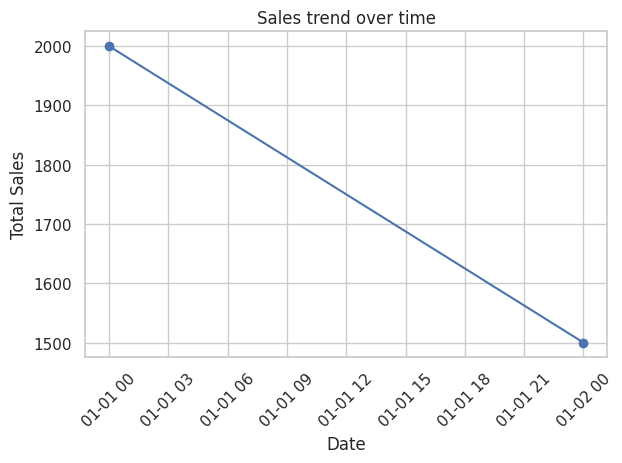

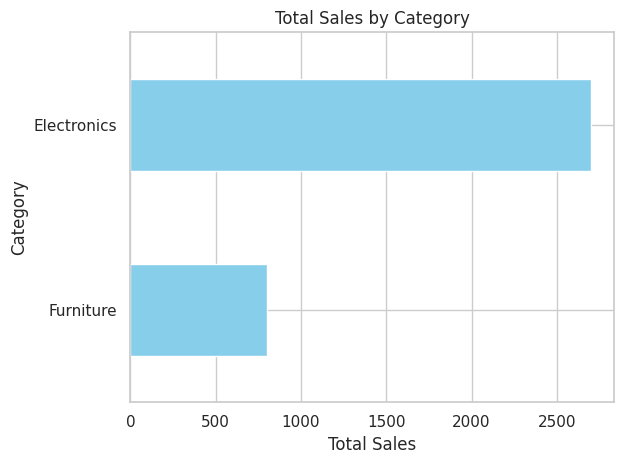

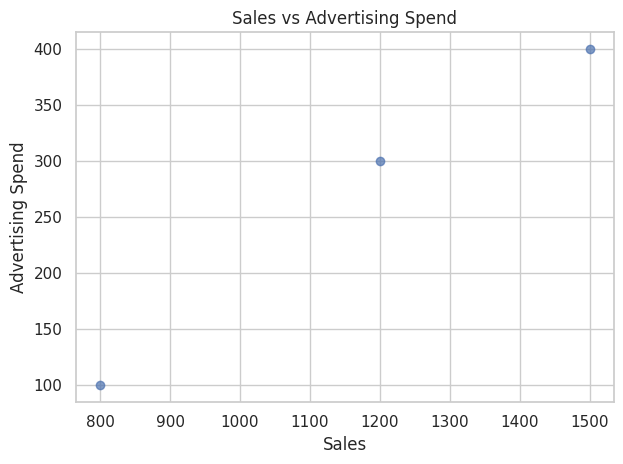

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style='whitegrid')

def filter_data(df, category=None, start_date=None, end_date=None):
  """
  Filter data by category and date range
  """
  if category:
    df = df[df['category'] == category]
  if start_date:
    df = df[df['date'] >= pd.to_datetime(start_date)]
  if end_date:
    df = df[df['date'] <= pd.to_datetime(end_date)]
  return df

def plot_sales_trend(df, savefig=False):
    """
    Plot sales trend over time.
    """
    sales_val = df.groupby('date')['sales'].sum()
    plt.plot(sales_val.index, sales_val.values, marker='o')
    plt.title("Sales trend over time")
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Total Sales')
    plt.tight_layout()
    if savefig:
      plt.savefig('sales_trend.png')
    plt.show()


def plot_category_sales(df, savefig=False):
    """
    Bar chart of sales by category.
    """
    cate_sales = df.groupby('category')['sales'].sum().sort_values()
    plt.figure()
    cate_sales.plot(kind='barh', color='skyblue')
    plt.title('Total Sales by Category')
    plt.xlabel('Total Sales')
    plt.ylabel('Category')
    plt.tight_layout()
    if savefig:
        plt.savefig('category_sales.png')
    plt.show()


def plot_sales_vs_adspend(df, savefig=False):
    """
    Scatter plot: sales vs ad spend.
    """
    plt.figure()
    plt.scatter(df['sales'], df['ad_spend'], alpha=0.7)
    plt.title('Sales vs Advertising Spend')
    plt.xlabel('Sales')
    plt.ylabel('Advertising Spend')
    plt.tight_layout()
    if savefig:
        plt.savefig('sales_vs_adspend.png')
    plt.show()

def main():
  selected_cat = None
  start_date = None
  end_date = None

  df_filtered = filter_data(df, category=selected_cat, start_date=start_date, end_date=end_date)

  plot_sales_trend(df_filtered)
  plot_category_sales(df_filtered)
  plot_sales_vs_adspend(df_filtered)

if __name__ == "__main__":
  main()

## Simulated E-Commerce Dataset


In [ ]:
data = """
order_id,date,customer_id,region,product_category,product_id,units_sold,unit_price,sales,ad_spend,profit,customer_segment,discount,returned
1001,2025-08-01,C001,North,Electronics,P01,2,450,900,50,180,Consumer,0,0
1002,2025-08-01,C002,West,Furniture,P02,1,700,700,20,140,Corporate,10,0
1003,2025-08-02,C003,South,Office Supplies,P03,10,30,300,10,60,Home Office,5,1
1004,2025-08-02,C001,North,Electronics,P04,1,1200,1200,100,240,Consumer,0,0
1005,2025-08-03,C004,East,Furniture,P05,3,350,1050,40,210,Consumer,15,0
1006,2025-08-03,C005,West,Office Supplies,P06,5,40,200,15,40,Corporate,0,0
1007,2025-08-04,C006,South,Electronics,P01,1,450,450,60,90,Home Office,0,0
1008,2025-08-04,C007,East,Electronics,P03,2,600,1200,80,240,Consumer,5,1
1009,2025-08-05,C008,North,Furniture,P02,2,700,1400,30,280,Corporate,20,0
1010,2025-08-05,C009,West,Office Supplies,P06,8,40,320,12,64,Home Office,0,0
"""

from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(data))
df.head()

,order_id,date,customer_id,region,product_category,product_id,units_sold,unit_price,sales,ad_spend,profit,customer_segment,discount,returned
0,1001,2025-08-01,C001,North,Electronics,P01,2,450,900,50,180,Consumer,0,0
1,1002,2025-08-01,C002,West,Furniture,P02,1,700,700,20,140,Corporate,10,0
2,1003,2025-08-02,C003,South,Office Supplies,P03,10,30,300,10,60,Home Office,5,1
3,1004,2025-08-02,C001,North,Electronics,P04,1,1200,1200,100,240,Consumer,0,0
4,1005,2025-08-03,C004,East,Furniture,P05,3,350,1050,40,210,Consumer,15,0


**Business Problem**

Figure out which customer segments are most profitable -> target marketing promotion

**Technical Goal**

- Analyze sales and profit by customer segment
- Visualize segment-wise trends, average profit per order, and return rates

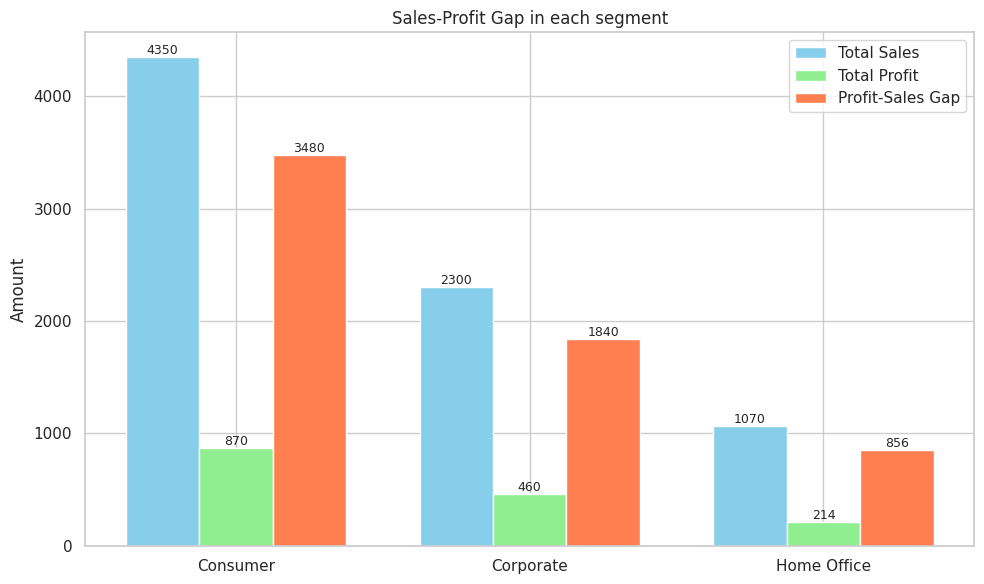

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set style for plots
sns.set(style='whitegrid')

def plot_sales_profit_gap(df):
  """
  Visualize the gap between profits and sales
  in each segment
  """
    # calculate sales by customer segment
  sales_seg = df.groupby('customer_segment')['sales'].sum()
  prof_seg = df.groupby('customer_segment')['profit'].sum()
  gap_seg = sales_seg - prof_seg

    # Bar width and x locations
  w, x = 0.25, np.arange(len(sales_seg.index))

  fig, ax = plt.subplots(figsize=(10,6))
  sales_bar = ax.bar(x-w, sales_seg, width=w, label='Total Sales', color='skyblue')
  profit_bar = ax.bar(x, prof_seg, width=w, label='Total Profit', color='lightgreen')
  gap_bar = ax.bar(x+w, gap_seg, width=w, label='Profit-Sales Gap', color='coral')

  for bars in [sales_bar, profit_bar, gap_bar]:
    for bar in bars:
      height = bar.get_height()
      ax.annotate(f'{int(height)}',
                    (bar.get_x() + bar.get_width()/2, height),
                    ha='center', va='bottom', fontsize=9)

  ax.set_xticks(x)
  ax.set_xticklabels(sales_seg.index)
  ax.set_ylabel('Amount')
  ax.set_title('Sales-Profit Gap in each segment')
  ax.legend()
  plt.tight_layout()

plot_sales_profit_gap(df)

**Operational Problem**

“Can we predict which orders are likely to be returned, based on order characteristics?”

**Technical Goal**

- Explore relationship between discount, product category, region, and return rate.
- Visualize these relationships and build a return prediction model.


**Product/Revenue Growth**

“Which products or categories should we promote to maximize profit during the holiday season?”

**Technical Goal**

- Identify top-performing products/categories by sales and profit in recent months.
- Visualize sales trends and profit margins over time, focusing on seasonal patterns.

**Resource Allocation**
“Is our advertising spend leading to increased sales in every region?”

**Technical Goal**

- Analyze correlation between advertising spend and sales, broken down by region and category.
- Visualize scatter plots and regression lines to show impact.